Asia-REQ0 from Asia routed to DC-Asia
Europe-REQ0 from Europe routed to DC-Asia
America-REQ0 from America routed to DC-Europe
America-REQ1 from America routed to DC-Europe
Asia-REQ1 from Asia routed to DC-America
Europe-REQ1 from Europe routed to DC-America
America-REQ2 from America routed to DC-Asia
Asia-REQ2 from Asia routed to DC-Europe
Europe-REQ2 from Europe routed to DC-America
America-REQ3 from America routed to DC-Asia
Asia-REQ3 from Asia routed to DC-Europe
DC-Europe served America-REQ0 in 0.66 sec
Europe-REQ3 from Europe routed to DC-Europe
America-REQ4 from America routed to DC-America
DC-Asia served Asia-REQ0 in 0.73 sec
Asia-REQ4 from Asia routed to DC-Asia
Europe-REQ4 from Europe routed to DC-Asia
DC-America served Asia-REQ1 in 0.77 sec
America-REQ5 from America routed to DC-America
DC-Europe served America-REQ1 in 0.38 sec
America-REQ6 from America routed to DC-Europe
Asia-REQ5 from Asia routed to DC-Europe
Europe-REQ5 from Europe routed to DC-America
Asia-REQ6 from Asia

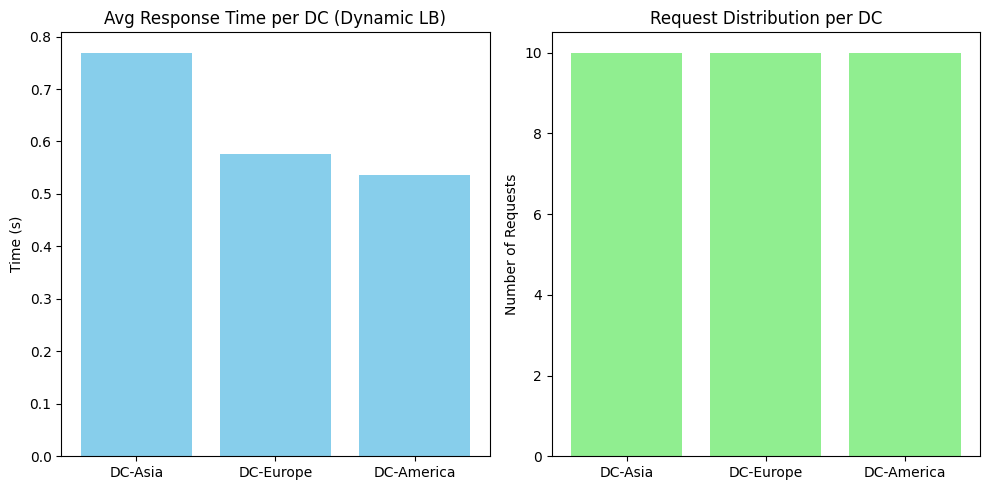

In [ ]:
import random
import time
import threading
import matplotlib.pyplot as plt
from queue import Queue

user_regions = ["Asia", "Europe", "America"]
data_centers = {
    "DC-Asia": {"region": "Asia"},
    "DC-Europe": {"region": "Europe"},
    "DC-America": {"region": "America"}
}

# Define DataCenter class
class DataCenter:
    def __init__(self, name):
        self.name = name
        self.queue = Queue()
        self.total_response_time = 0
        self.total_requests = 0

    def process_requests(self):
        while True:
            req = self.queue.get()
            response_time = random.uniform(0.2, 1.0)  # Simulate time
            time.sleep(response_time)
            self.total_response_time += response_time
            self.total_requests += 1
            print(f"{self.name} served {req} in {response_time:.2f} sec", flush=True)

# Create DC objects
dc_objects = {name: DataCenter(name) for name in data_centers}

# Fix route_request: choose least loaded DC and return its name
def route_request(user_region, request):
    least_loaded_dc = min(dc_objects.values(), key=lambda dc: dc.queue.qsize())
    least_loaded_dc.queue.put(request)
    return least_loaded_dc.name

# Simulate users from a region sending requests
def user_simulator(region, data_centers):
    for i in range(10):
        request_id = f"{region}-REQ{i}"
        routed_dc = route_request(region, request_id)
        print(f"{request_id} from {region} routed to {routed_dc}", flush=True)
        time.sleep(random.uniform(0.1, 0.3))

# Start data center processing threads
for dc in dc_objects.values():
    threading.Thread(target=dc.process_requests, daemon=True).start()

# Start user request threads
for region in user_regions:
    threading.Thread(target=user_simulator, args=(region, dc_objects)).start()



# Wait for all processing to finish
for i in range(20):
    time.sleep(0.5)


# After simulation
labels = []
response_times = []
request_counts = []

for name, dc in dc_objects.items():
    labels.append(name)
    avg_time = dc.total_response_time / dc.total_requests if dc.total_requests else 0
    response_times.append(avg_time)
    request_counts.append(dc.total_requests)

# Plot average response time
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.bar(labels, response_times, color='skyblue')
plt.title('Avg Response Time per DC (Dynamic LB)')
plt.ylabel('Time (s)')

# Plot total requests handled
plt.subplot(1, 2, 2)
plt.bar(labels, request_counts, color='lightgreen')
plt.title('Request Distribution per DC')
plt.ylabel('Number of Requests')

plt.tight_layout()
plt.show()